In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [10]:
df.drop(['Name'],axis='columns',inplace=True)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


Text(0, 0.5, 'Income($)')

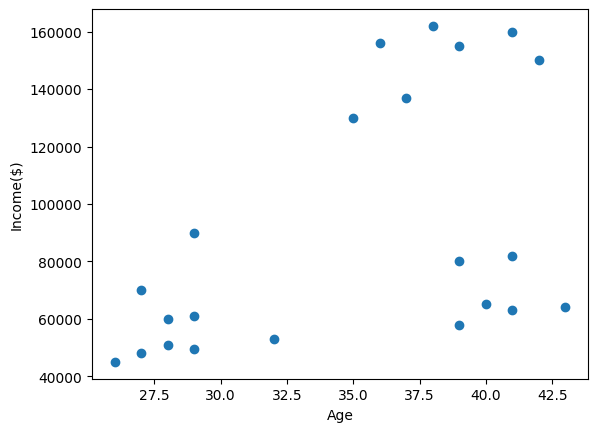

In [12]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [17]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [19]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [20]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


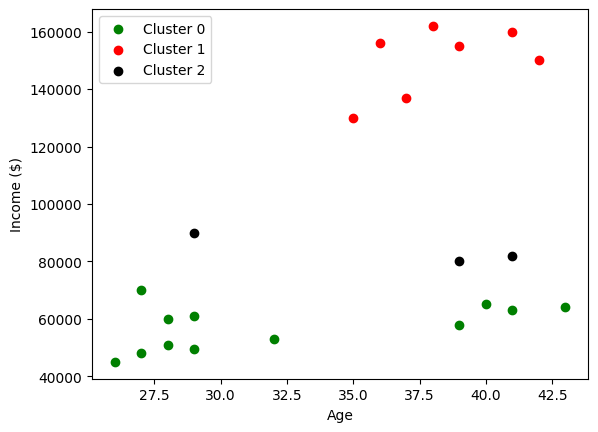

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Cluster 2')


plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

Elbow plot

In [26]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

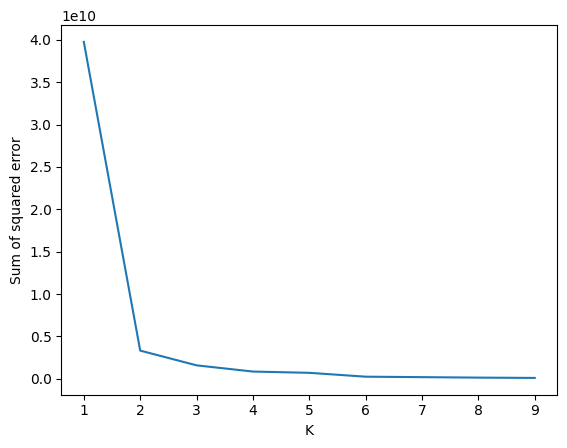

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [28]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [29]:
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


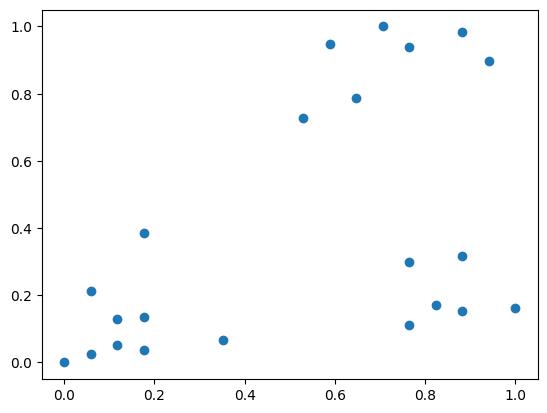

In [30]:
plt.scatter(df.Age,df['Income($)'])

In [31]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [32]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,2


In [33]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

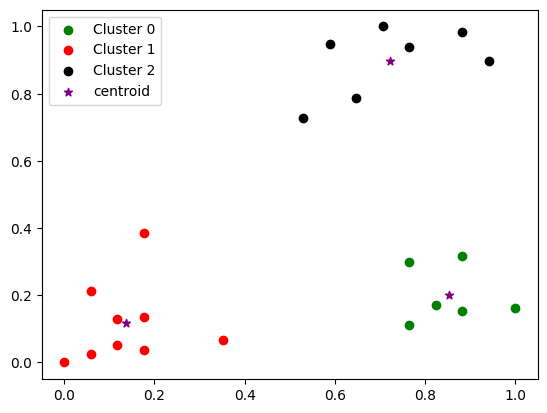

In [35]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()